In [63]:
import os,glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import sys
import category_encoders as ce
from utils import *
pd.set_option('display.max_columns', 50)

In [64]:
df = read_new_csv()
df_train, df_test = df_split(df)

../feature/10301450.csv was read


In [65]:
'''df = read_csv(ALL)
df_train, df_test = df_split(df)'''

'df = read_csv(ALL)\ndf_train, df_test = df_split(df)'

In [53]:
df_train.head()

,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,grade.1,credit_score,application_type,loan_status,amnt_per_year,grade_ordinal,interest,sum_amnt,grade_bin,amntpyear_bin,interest_grade,interest_0,interest_1,interest_2,interest_3,interest_4,0,1,2,3,4
7500,0,1256.710800,5,10.603779,6,5,debt_consolidation,B1,680.431766,Individual,0.0,251.342160,6,666.294160,1923.004960,1,0,interest_1,0,1,0,0,0,1,0,0,0,0
7501,1,569.559607,3,17.305565,15,3,house,C5,713.063128,Individual,0.0,189.853202,15,295.696531,865.256138,2,0,interest_3,0,0,0,1,0,1,0,0,0,0
7502,2,1118.838050,3,14.041342,13,2,debt_consolidation,C3,696.137378,Individual,1.0,372.946017,13,471.299617,1590.137667,2,1,interest_2,0,0,1,0,0,0,1,0,0,0
7503,3,610.721728,3,13.048348,12,5,medical,C2,656.373090,Individual,0.0,203.573909,12,239.067289,849.789017,2,0,interest_2,0,0,1,0,0,1,0,0,0,0
7504,4,1180.026840,3,11.384862,8,10,debt_consolidation,B3,657.211233,Individual,0.0,393.342280,8,403.033299,1583.060139,1,1,interest_1,0,1,0,0,0,0,1,0,0,0


In [4]:
df_test.head()

,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type
17500,0,1742.228656,5 years,7.992879,A4,8 years,debt_consolidation,677.196371,Individual
17501,1,630.300979,3 years,13.604302,D3,6 years,debt_consolidation,655.143270,Individual
17502,2,1606.895116,5 years,24.674460,C5,10 years,credit_card,680.532978,Individual
17503,3,1120.716185,3 years,13.407068,C1,1 year,credit_card,659.544561,Individual
17504,4,688.615551,3 years,18.118501,C2,10 years,other,654.822203,Individual


# カテゴリカル変数

## 2値を01で振る

In [22]:
df["Gender_binnary"] = df["Gender"].replace({"Male":1, "Female":0})

## yearを削除する。

In [24]:
def drop_year(s):
    s = s.replace(' years', '')
    s = s.replace(' year', '')
    return s

In [25]:
target = ['term', 'employment_length']
df[target] = df[target].applymap(drop_year)

In [26]:

df[target] = df[target].astype(int)


In [33]:

df.head()

,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type,loan_status,is_train,amnt_per_year
0,0,1256.710800,5,10.603779,B1,5,debt_consolidation,680.431766,Individual,0.0,True,251.342160
1,1,569.559607,3,17.305565,C5,3,house,713.063128,Individual,0.0,True,189.853202
2,2,1118.838050,3,14.041342,C3,2,debt_consolidation,696.137378,Individual,1.0,True,372.946017
3,3,610.721728,3,13.048348,C2,5,medical,656.373090,Individual,0.0,True,203.573909
4,4,1180.026840,3,11.384862,B3,10,debt_consolidation,657.211233,Individual,0.0,True,393.342280


## gradeをAからFにふる



In [3]:
df_grade = df
df_grade = df_grade.sort_values('grade')

list_cols = ['grade']

# 序数をカテゴリに付与して変換
ce_oe = ce.OrdinalEncoder(cols=list_cols,handle_unknown='impute')
df_session_ce_ordinal = ce_oe.fit_transform(df_grade)
df_session_ce_ordinal.head()

/Users/kohei/.pyenv/versions/3.8.7/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type,loan_status,is_train,amnt_per_year
21144,3644,2517.128049,3,7.449013,1,2,debt_consolidation,712.481128,Individual,NaN,False,839.042683
1379,1379,505.531459,3,7.263932,1,3,house,709.307987,Individual,0.0,True,168.510486
468,468,1133.297760,3,7.581733,1,6,debt_consolidation,790.545990,Individual,0.0,True,377.765920
12549,12549,2217.912786,3,10.018127,1,0,home_improvement,711.459289,Individual,0.0,True,739.304262
18089,589,2465.781077,3,7.137884,1,8,debt_consolidation,786.529540,Individual,NaN,False,821.927026


In [10]:
df = pd.concat([df_session_ce_ordinal, df.grade], axis=1, join='inner')
df = df.sort_values('id')
df = df.sort_values(['is_train', 'id'])
save_feature(df)

../feature/10011902.csv
save completed


In [29]:
def bin_grade(s):
    s = s[0]
    if s == "A":
        r = 0
    elif s == "B":
        r = 1
    elif s == "C":
        r = 2
    elif s == "D":
        r = 3
    elif s == "E":
        r = 4
    elif s == "F":
        r = 5
    return r

In [31]:
df["grade_bin"] = df["grade.1"].map(bin_grade)
save_feature(df)

../feature/10012033.csv
save completed


## 利子を求める


In [48]:
df["interest"] = df["loan_amnt"]*df["interest_rate"]*0.01*df["term"]

In [21]:
df["sum_amnt"] = df["loan_amnt"]+df["interest"]

## amnt_per_yearをone-hot(没)

In [35]:
def amnt_per_grade(s):
    #s = s[0]
    if s <= 277:
        r = 0
    elif 277<s<=430:
        r = 1
    elif 430<s<=598:
        r = 2
    elif 598<s<=929:
        r = 3
    elif 929<=s:
        r = 4
    return r

In [36]:
df["amntpyear_bin"] = df["amnt_per_year"].map(amnt_per_grade)
df

,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,grade.1,credit_score,application_type,loan_status,is_train,amnt_per_year,grade_ordinal,interest,sum_amnt,grade_bin,amntpyear_bin,interest_grade,interest_0,interest_1,interest_2,interest_3,interest_4
0,0,1742.228656,5,7.992879,4,8,debt_consolidation,A4,677.196371,Individual,NaN,False,348.445731,4,696.271104,2438.499760,0,1,interest_0,1,0,0,0,0
1,1,630.300979,3,13.604302,18,6,debt_consolidation,D3,655.143270,Individual,NaN,False,210.100326,18,257.244152,887.545131,3,0,interest_2,0,0,1,0,0
2,2,1606.895116,5,24.674460,15,10,credit_card,C5,680.532978,Individual,NaN,False,321.379023,15,1982.463456,3589.358572,2,1,interest_4,0,0,0,0,1
3,3,1120.716185,3,13.407068,11,1,credit_card,C1,659.544561,Individual,NaN,False,373.572062,11,450.765548,1571.481733,2,1,interest_2,0,0,1,0,0
4,4,688.615551,3,18.118501,12,10,other,C2,654.822203,Individual,NaN,False,229.538517,12,374.300453,1062.916003,2,0,interest_3,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,17495,2495.568495,3,11.806962,8,10,credit_card,B3,679.886560,Individual,0.0,True,831.856165,8,883.952483,3379.520978,1,3,interest_1,0,1,0,0,0
24996,17496,636.151639,3,11.449207,7,0,car,B2,660.318169,Individual,1.0,True,212.050546,7,218.502956,854.654595,1,0,interest_1,0,1,0,0,0
24997,17497,2398.851088,5,24.501209,25,8,debt_consolidation,E5,657.758005,Individual,0.0,True,479.770218,25,2938.737610,5337.588698,4,2,interest_4,0,0,0,0,1
24998,17498,1010.424260,3,8.196667,5,0,medical,A5,707.729934,Individual,0.0,True,336.808087,5,248.463343,1258.887603,0,1,interest_0,1,0,0,0,0


In [37]:
df_dummied = pd.concat([df, pd.get_dummies(df.amntpyear_bin)], axis = 1)

In [26]:
save_feature(df_dummied)

../feature/10301235.csv
save completed


In [39]:
save_feature(df_dummied)

../feature/10301306.csv
save completed


## loan_amntをone-hot

In [67]:
def loan_grader(s):
    #s = s[0]
    if s <= 835:
        r = 0
    elif 835<s<=1343:
        r = 1
    elif 1343<s<=1852:
        r = 2
    elif 1852<s<=2756:
        r = 3
    elif 2756<=s:
        r = 4
    return "loan_"+str(r)

df["loan_grade"] = df["loan_amnt"].map(loan_grader)
df_dummied = pd.concat([df, pd.get_dummies(df.loan_grade)], axis = 1)
df_dummied
save_feature(df_dummied)

../feature/10301504.csv
save completed


## 金利もone-hot

In [30]:
def interest_grade(s):
    #s = s[0]
    if s <= 9.38:
        r = 0
    elif 9.38<s<=12.88:
        r = 1
    elif 12.88<s<=15.69:
        r = 2
    elif 15.69<s<=20.12:
        r = 3
    elif 20.12<=s:
        r = 4
    return "interest_"+str(r)

In [32]:
df["interest_grade"] = df["interest_rate"].map(interest_grade)
df_dummied = pd.concat([df, pd.get_dummies(df.interest_grade)], axis = 1)
df_dummied

,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,grade.1,credit_score,application_type,loan_status,is_train,amnt_per_year,grade_ordinal,interest,sum_amnt,grade_bin,amntpyear_bin,interest_grade,interest_0,interest_1,interest_2,interest_3,interest_4
0,0,1742.228656,5,7.992879,4,8,debt_consolidation,A4,677.196371,Individual,NaN,False,348.445731,4,696.271104,2438.499760,0,1,interest_0,1,0,0,0,0
1,1,630.300979,3,13.604302,18,6,debt_consolidation,D3,655.143270,Individual,NaN,False,210.100326,18,257.244152,887.545131,3,0,interest_2,0,0,1,0,0
2,2,1606.895116,5,24.674460,15,10,credit_card,C5,680.532978,Individual,NaN,False,321.379023,15,1982.463456,3589.358572,2,1,interest_4,0,0,0,0,1
3,3,1120.716185,3,13.407068,11,1,credit_card,C1,659.544561,Individual,NaN,False,373.572062,11,450.765548,1571.481733,2,1,interest_2,0,0,1,0,0
4,4,688.615551,3,18.118501,12,10,other,C2,654.822203,Individual,NaN,False,229.538517,12,374.300453,1062.916003,2,0,interest_3,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,17495,2495.568495,3,11.806962,8,10,credit_card,B3,679.886560,Individual,0.0,True,831.856165,8,883.952483,3379.520978,1,3,interest_1,0,1,0,0,0
24996,17496,636.151639,3,11.449207,7,0,car,B2,660.318169,Individual,1.0,True,212.050546,7,218.502956,854.654595,1,0,interest_1,0,1,0,0,0
24997,17497,2398.851088,5,24.501209,25,8,debt_consolidation,E5,657.758005,Individual,0.0,True,479.770218,25,2938.737610,5337.588698,4,2,interest_4,0,0,0,0,1
24998,17498,1010.424260,3,8.196667,5,0,medical,A5,707.729934,Individual,0.0,True,336.808087,5,248.463343,1258.887603,0,1,interest_0,1,0,0,0,0


In [33]:
save_feature(df_dummied)

../feature/10301302.csv
save completed


# creditもone-hot

In [62]:
def credit_grader(s):
    #s = s[0]
    if s <= 671:
        r = 0
    elif 671<s<=691:
        r = 1
    elif 691<s<=704:
        r = 2
    elif 704<s<=744:
        r = 3
    elif 744<=s:
        r = 4
    return "credit_"+str(r)
df["credit_grade"] = df["credit_score"].map(credit_grader)
df_dummied = pd.concat([df, pd.get_dummies(df.credit_grade)], axis = 1)
df_dummied
save_feature(df_dummied)

../feature/10301450.csv
save completed


## majorを抜き出す。

In [56]:
def get_major(s):
    if s == 'major_purchase':
        return 1
    else:
        return 0
df["purpose_major"] = df["purpose"].map(get_major)


In [60]:
save_feature(df)

../feature/10301336.csv
save completed


明らかに５つのグループがありそう=> グループ分け
０が低い、４が高い
creditは反転

## scoreとgradeの統一指標
- gradeをそれぞれscoreで置き換える。

In [75]:
def get_major(s):
    return np.mean(df[df.grade == s].credit_score)
df["integral_score"] = df["grade"].map(get_major)

<AxesSubplot:xlabel='integral_score', ylabel='loan_status'>

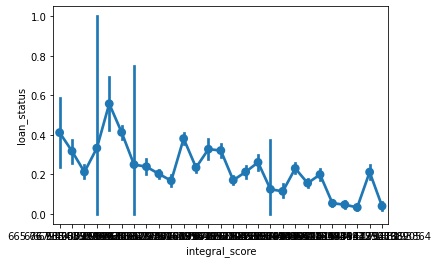

In [79]:
sns.pointplot(x = "integral_score", data = df, y = TARGET)

In [80]:
save_feature(df)

../feature/10301905.csv
save completed
